In [1]:
import os
from fidelity_simulation import FidelitySimulation
from pulse import RectangleReadoutPulse

In [2]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")
s_parameters_file_state_0 = os.path.join(data_dir_path,
                                         "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_shifted_mock_156_kHz.s2p")
s_parameters_file_state_1 = os.path.join(data_dir_path,
                                         "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12.s2p")

shift_f = 156 * 10 ** 3
f_state_1 = 7.2669 * 10 ** 9
N = 2 ** 23  # Number of sample points (power of 2 for FFT efficiency)
pulse_frequency = f_state_1 + shift_f/2

In [3]:
rect_readout_pulse = RectangleReadoutPulse(carrier_frequency=pulse_frequency,
                                                  pulse_width=3.5 * 10 ** (-6),
                                                  pulse_amplitude=1.0,
                                                  total_signal_time=4 * 10 ** (-4))
# plot_f_edges = (rect_readout_pulse.carrier_frequency * 0.99, rect_readout_pulse.carrier_frequency * 1.01)
# plot_t_edges = (rect_readout_pulse.pulse_start_time * 0.99, (rect_readout_pulse.pulse_start_time + rect_readout_pulse.pulse_width) * 1.01)
# rect_readout_pulse.plot_pulse(plot_t_edges=plot_t_edges, plot_f_edges=plot_f_edges)

In [4]:
fidelity_simulation = FidelitySimulation(s_parameters_file_state_0=s_parameters_file_state_0,
                                         s_parameters_file_state_1=s_parameters_file_state_1,
                                         readout_pulse=rect_readout_pulse,
                                         IQ_projection_frequency=pulse_frequency,
                                         num_iterations=50)

100%|██████████| 50/50 [00:03<00:00, 13.31it/s]


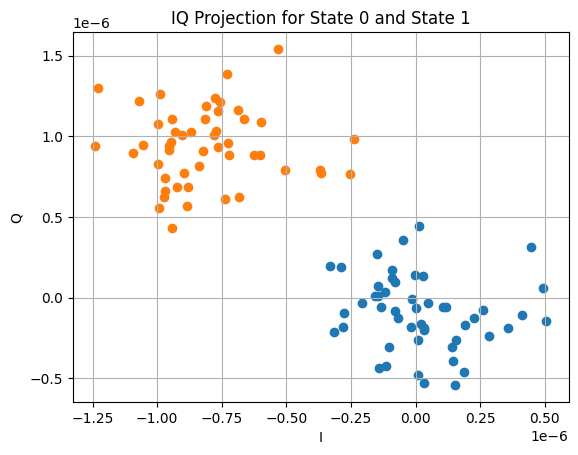

In [5]:
fidelity_simulation.run()